In [342]:
import numpy as np
import pandas as pd 
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.utils import to_categorical
from sklearn.cross_validation import train_test_split
import matplotlib.pyplot as plt
import random
import os

In [343]:
FAST_RUN = True
IMAGE_WIDTH=128
IMAGE_HEIGHT=128
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS=3
PATH="C:/Users/Mplab/Desktop/hem/train_data"
TESTPATH="C:/Users/Mplab/Desktop/hem/test_data"

In [344]:
os.chdir("C:/Users/Mplab/Desktop/hem/")

In [345]:
labels=pd.read_csv("train_labels.csv",dtype=int,names=['hemorrhage'],header=None)
labels=labels.astype(str)
labels.head()


,hemorrhage
0,1
1,1
2,0
3,0
4,1


In [346]:
filenames=["Train_{}.png".format(i) for i in range(len(os.listdir(PATH)))]
print(filenames)

['Train_0.png', 'Train_1.png', 'Train_2.png', 'Train_3.png', 'Train_4.png', 'Train_5.png', 'Train_6.png', 'Train_7.png', 'Train_8.png', 'Train_9.png', 'Train_10.png', 'Train_11.png', 'Train_12.png', 'Train_13.png', 'Train_14.png', 'Train_15.png', 'Train_16.png', 'Train_17.png', 'Train_18.png', 'Train_19.png', 'Train_20.png', 'Train_21.png', 'Train_22.png', 'Train_23.png', 'Train_24.png', 'Train_25.png', 'Train_26.png', 'Train_27.png', 'Train_28.png', 'Train_29.png', 'Train_30.png', 'Train_31.png', 'Train_32.png', 'Train_33.png', 'Train_34.png', 'Train_35.png', 'Train_36.png', 'Train_37.png', 'Train_38.png', 'Train_39.png', 'Train_40.png', 'Train_41.png', 'Train_42.png', 'Train_43.png', 'Train_44.png', 'Train_45.png', 'Train_46.png', 'Train_47.png', 'Train_48.png', 'Train_49.png', 'Train_50.png', 'Train_51.png', 'Train_52.png', 'Train_53.png', 'Train_54.png', 'Train_55.png', 'Train_56.png', 'Train_57.png', 'Train_58.png', 'Train_59.png', 'Train_60.png', 'Train_61.png', 'Train_62.png', '

In [347]:


df = pd.DataFrame({
    'filename': filenames,
    'categories':labels['hemorrhage'].values
})

df.head()


,categories,filename
0,1,Train_0.png
1,1,Train_1.png
2,0,Train_2.png
3,0,Train_3.png
4,1,Train_4.png


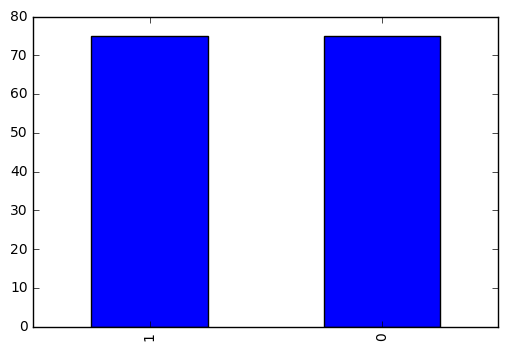

In [348]:
df['categories'].value_counts().plot.bar()
plt.show()

In [386]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization



model = Sequential()

#Layer 1
model.add(Conv2D(6, (3, 3), activation='relu', input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

#Layer 2
model.add(Flatten())
model.add(Dense(10, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax')) # 2 because we have cat and dog classes

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

model.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 126, 126, 6)       168       
_________________________________________________________________
batch_normalization_33 (Batc (None, 126, 126, 6)       24        
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 63, 63, 6)         0         
_________________________________________________________________
dropout_33 (Dropout)         (None, 63, 63, 6)         0         
_________________________________________________________________
flatten_17 (Flatten)         (None, 23814)             0         
_________________________________________________________________
dense_33 (Dense)             (None, 10)                238150    
_________________________________________________________________
batch_normalization_34 (Batc (None, 10)              

In [387]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
filepath="weights-{epoch:02d}-{val_accuracy:.2f}.hdf5"

earlystop = EarlyStopping(patience=10)
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=2, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)
checkpoint =  ModelCheckpoint(filepath,monitor='val_accuracy',verbose=1,save_best_only=True,mode='max')

callbacks = [earlystop, learning_rate_reduction, checkpoint]

In [388]:
train_df, validate_df = train_test_split(df, test_size=0.25)
train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)


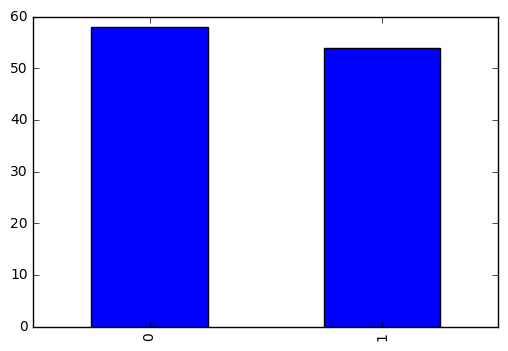

In [389]:
train_df['categories'].value_counts().plot.bar()
plt.show()

In [390]:
total_train = train_df.shape[0]
total_validate = validate_df.shape[0]
batch_size=5

In [391]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    zoom_range=0.02,
    horizontal_flip=True,
    width_shift_range=0.01,
    height_shift_range=0.01
)

train_generator = train_datagen.flow_from_dataframe(
    train_df, 
    PATH, 
    x_col='filename',
    y_col='categories',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)

Found 112 validated image filenames belonging to 2 classes.


In [392]:
validation_datagen = ImageDataGenerator(
    rescale=1./255
)

validation_generator = validation_datagen.flow_from_dataframe(
    validate_df, 
    PATH, 
    x_col='filename',
    y_col='categories',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)

Found 38 validated image filenames belonging to 2 classes.


In [393]:
example_df = train_df.sample(n=1).reset_index(drop=True)
example_generator = train_datagen.flow_from_dataframe(
    example_df, 
    PATH, 
    x_col='filename',
    y_col='categories',
    target_size=IMAGE_SIZE,
    class_mode='categorical'
)

Found 1 validated image filenames belonging to 1 classes.


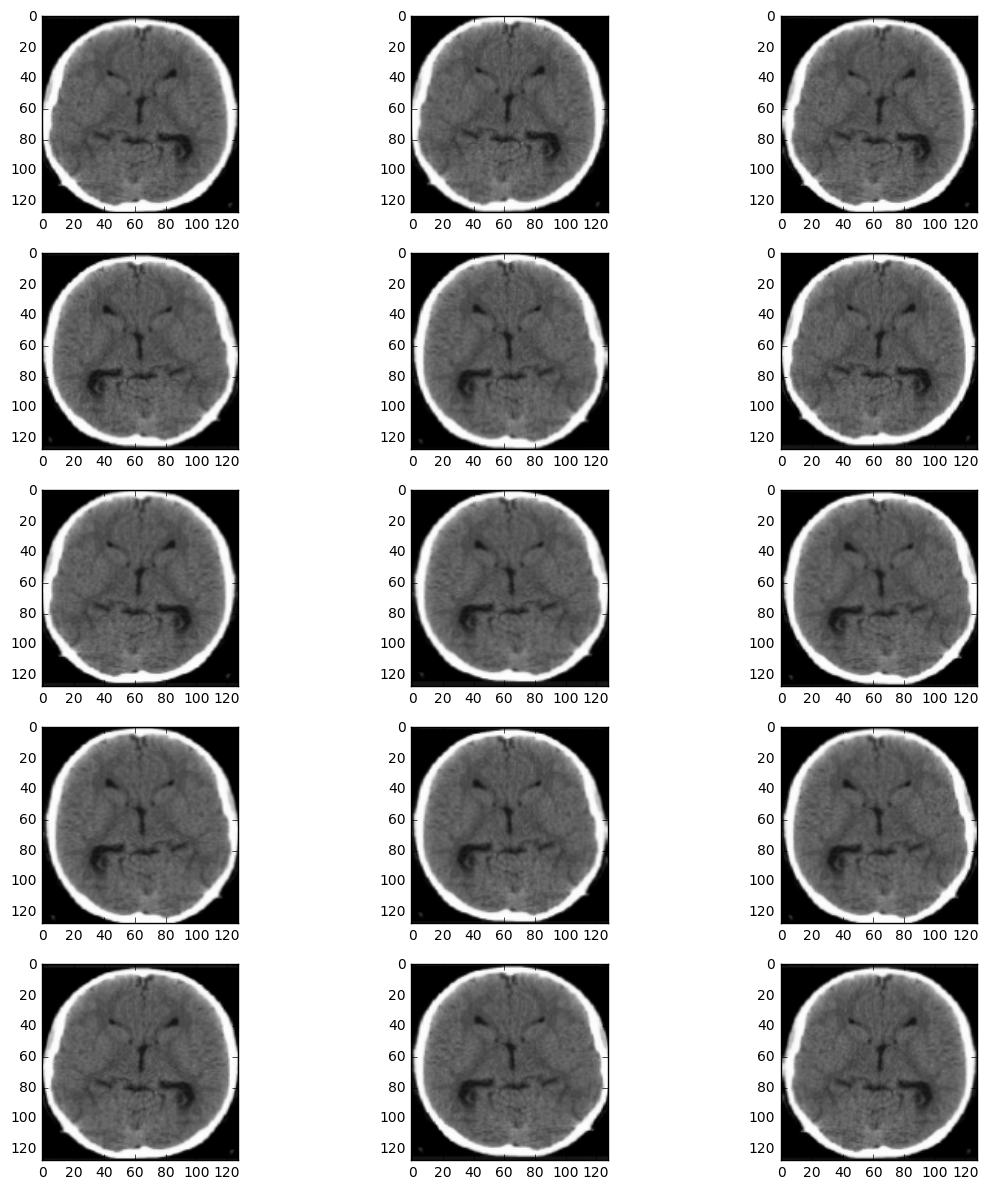

In [394]:
plt.figure(figsize=(12, 12))
for i in range(0, 15):
    plt.subplot(5, 3, i+1)
    for X_batch, Y_batch in example_generator:
        image = X_batch[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

In [395]:
epochs= 30 if FAST_RUN else 50
history = model.fit_generator(
    train_generator, 
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=total_validate//batch_size,
    steps_per_epoch=total_train//batch_size,
    callbacks=callbacks
)

Epoch 1/30
22/22 [==============================] - 1s 54ms/step - loss: 0.8820 - accuracy: 0.6449 - val_loss: 0.9895 - val_accuracy: 0.5714

Epoch 00001: val_accuracy improved from -inf to 0.57143, saving model to weights-01-0.57.hdf5
Epoch 2/30
22/22 [==============================] - 1s 54ms/step - loss: 0.6050 - accuracy: 0.6729 - val_loss: 0.6079 - val_accuracy: 0.4848

Epoch 00002: val_accuracy did not improve from 0.57143
Epoch 3/30
22/22 [==============================] - 1s 53ms/step - loss: 0.6150 - accuracy: 0.6916 - val_loss: 0.8639 - val_accuracy: 0.6667

Epoch 00003: val_accuracy improved from 0.57143 to 0.66667, saving model to weights-03-0.67.hdf5
Epoch 4/30
22/22 [==============================] - 1s 58ms/step - loss: 0.6296 - accuracy: 0.6729 - val_loss: 0.5884 - val_accuracy: 0.8485

Epoch 00004: val_accuracy improved from 0.66667 to 0.84848, saving model to weights-04-0.85.hdf5
Epoch 5/30
22/22 [==============================] - 1s 57ms/step - loss: 0.5477 - accurac

In [406]:
model.save_weights("model_best_86.h5")

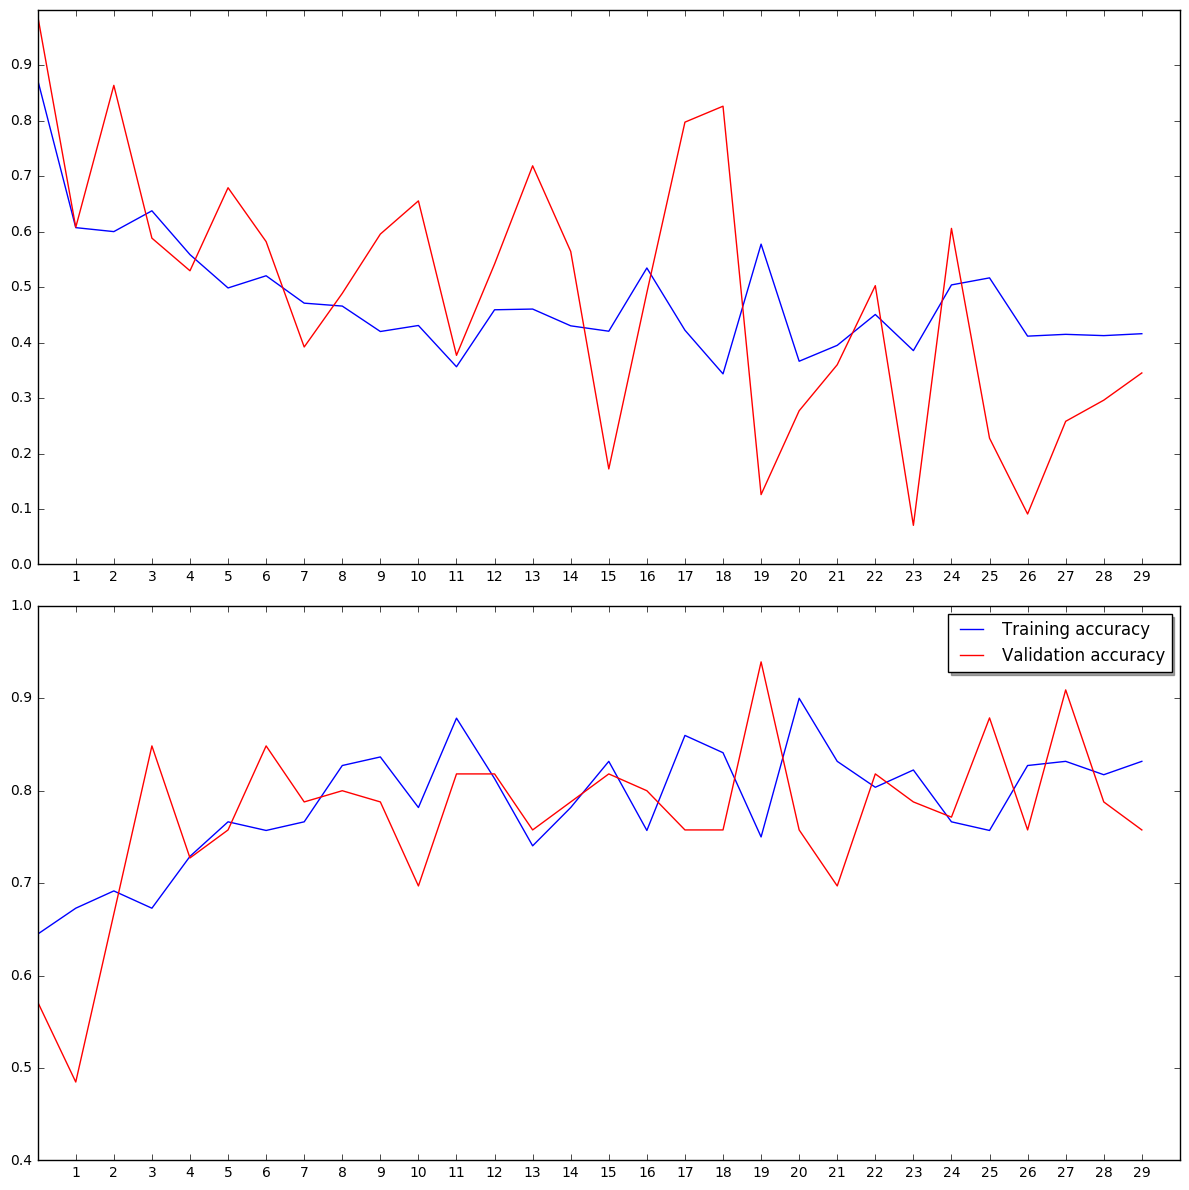

In [396]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
ax1.plot(history.history['loss'], color='b', label="Training loss")
ax1.plot(history.history['val_loss'], color='r', label="Validation loss")
ax1.set_xticks(np.arange(1, epochs, 1))
ax1.set_yticks(np.arange(0, 1, 0.1))

ax2.plot(history.history['accuracy'], color='b', label="Training accuracy")
ax2.plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
ax2.set_xticks(np.arange(1, epochs, 1))

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()

In [397]:
test_filenames = os.listdir(TESTPATH)
test_df = pd.DataFrame({
    'filename': test_filenames
})
nb_samples = test_df.shape[0]

In [398]:
test_gen = ImageDataGenerator(rescale=1./255)
test_generator = test_gen.flow_from_dataframe(
    test_df, 
    TESTPATH, 
    x_col='filename',
    y_col=None,
    class_mode=None,
    target_size=IMAGE_SIZE,
    batch_size=batch_size,
    shuffle=False
)

Found 50 validated image filenames.


In [399]:
predict = model.predict_generator(test_generator, steps=np.ceil(nb_samples/batch_size))

In [400]:
test_df['categories'] = np.argmax(predict, axis=-1)

In [401]:
label_map = dict((v,k) for k,v in train_generator.class_indices.items())
test_df['categories'] = test_df['categories'].replace(label_map)

In [402]:
test_df['categories'] = test_df['categories'].replace({ 1: 'hemorrhage', 0: 'non-hemorrhage' })

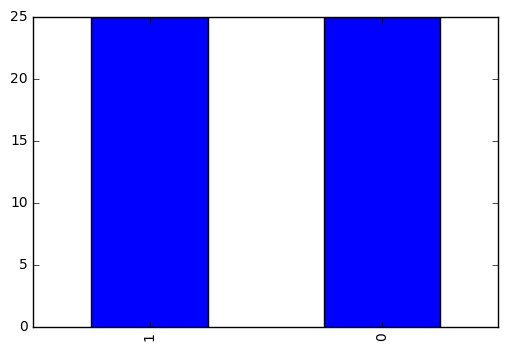

In [403]:
test_df['categories'].value_counts().plot.bar()
plt.show()

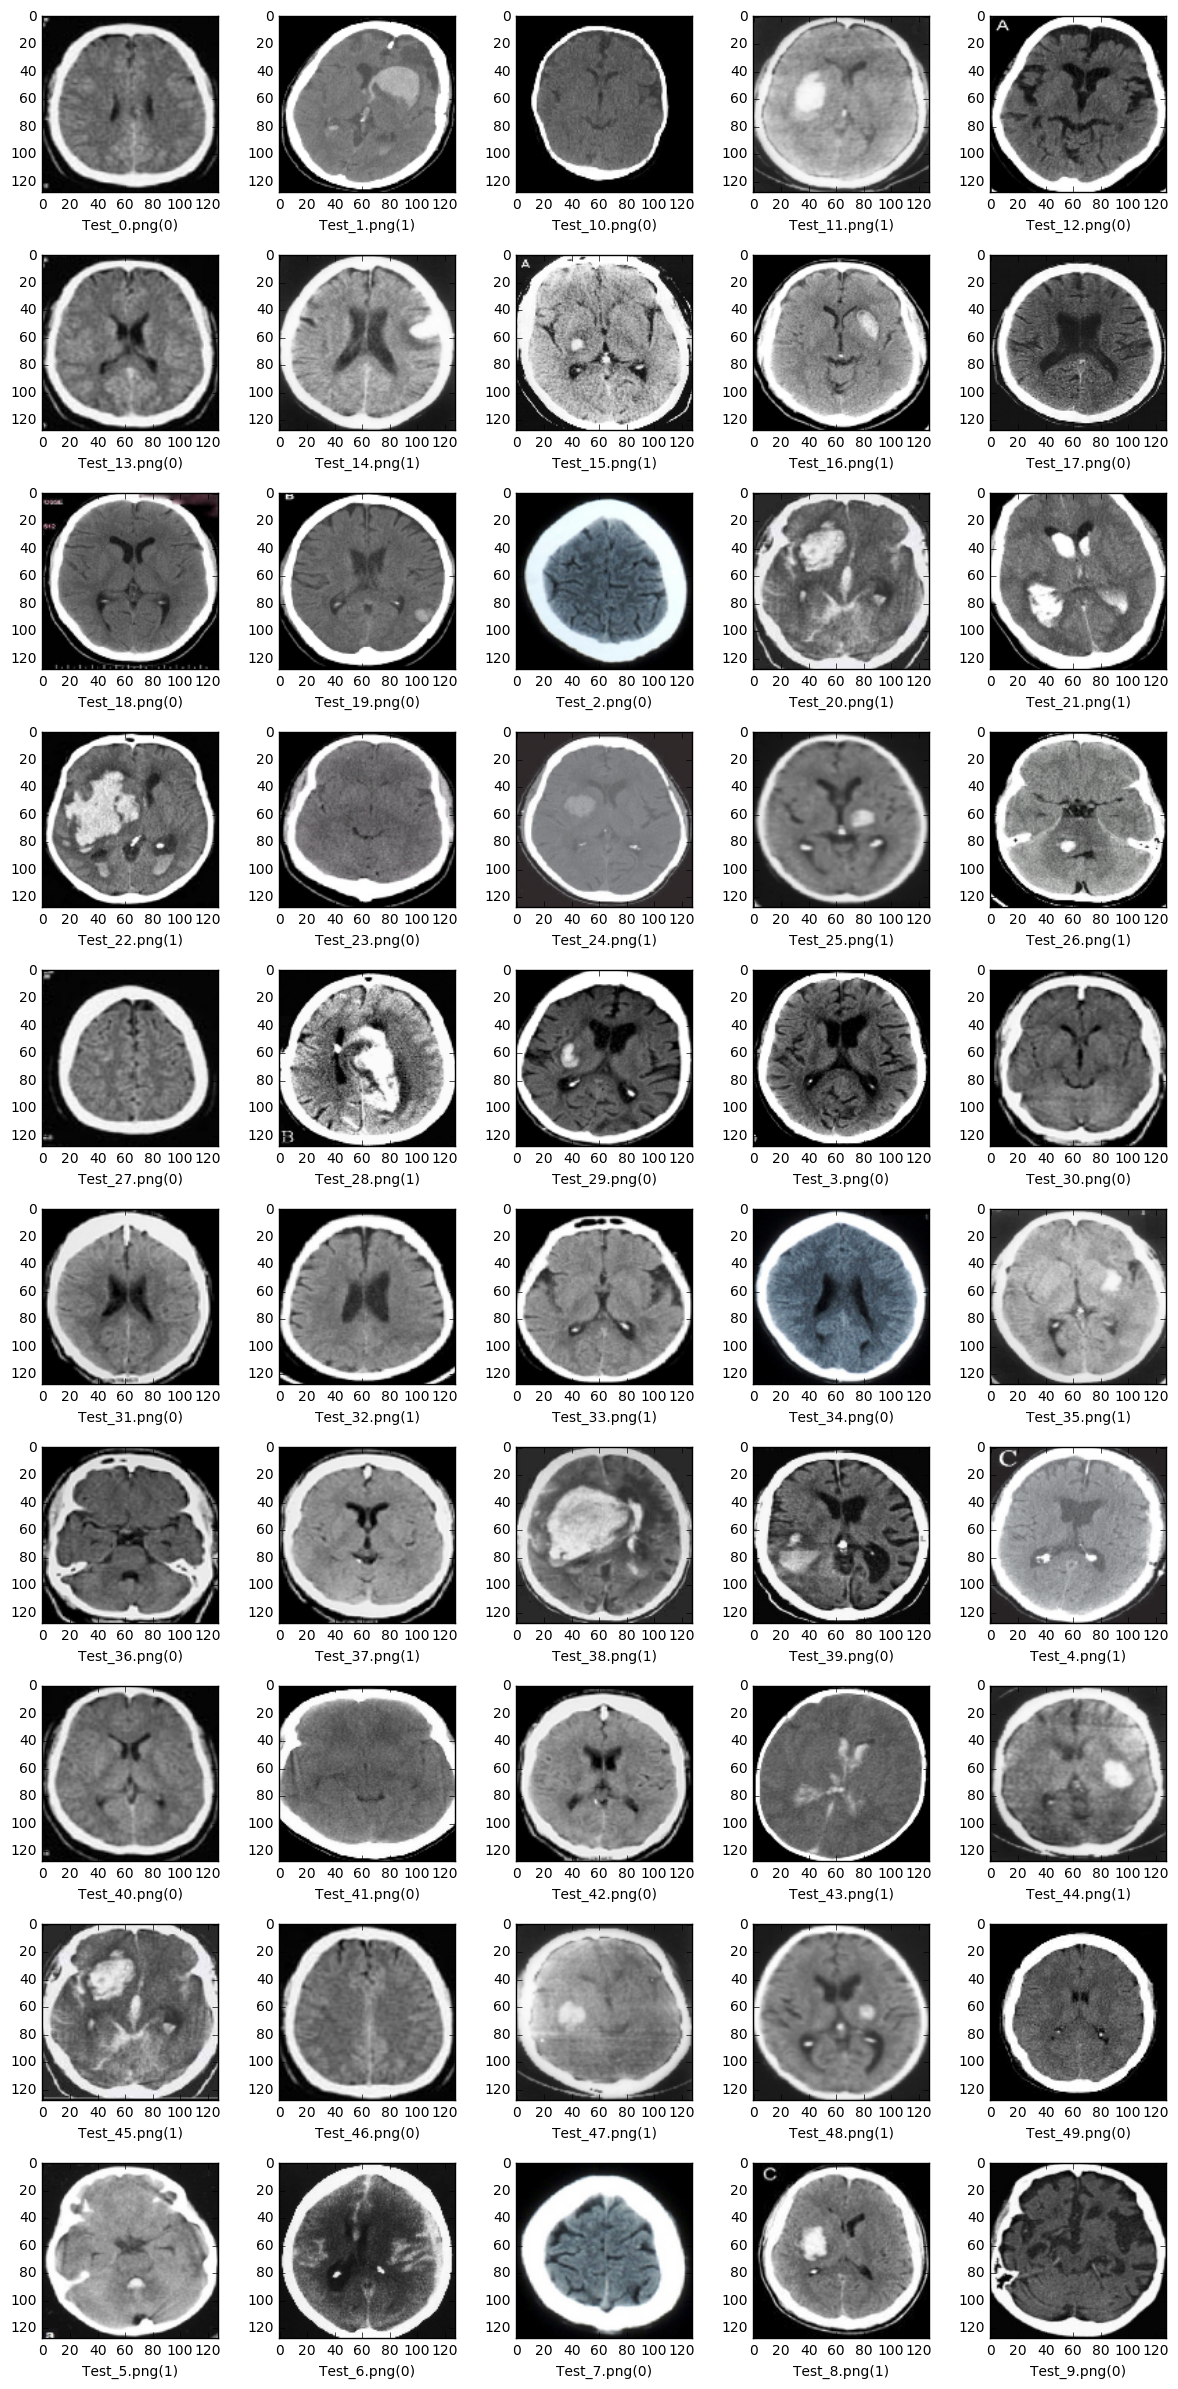

In [404]:
sample_test = test_df.head(50)
sample_test.head()
plt.figure(figsize=(12, 24))
for index, row in sample_test.iterrows():
    filename = row['filename']
    category = row['categories']
    img = load_img(TESTPATH+'/'+filename, target_size=IMAGE_SIZE)
    plt.subplot(10, 5, index+1)
    plt.imshow(img)
    plt.xlabel(filename + '(' + "{}".format(category) + ')' )
plt.tight_layout()
plt.show()

In [405]:
submission_df = test_df.copy()
submission_df['id'] = submission_df['filename'].str.split('.').str[0]
submission_df['label'] = submission_df['categories']
submission_df.drop(['filename', 'categories'], axis=1, inplace=True)
submission_df.to_csv('submission-86.csv', index=False)